In [2]:
import numpy as np

import os

import cv2
import matplotlib.pyplot as plt

In [36]:
img_list = []

path = 'XCTData/Sample2'

file_list = os.listdir(path)

for img_name in file_list[:10]:
    img_list.append(cv2.imread(path+"/"+img_name))

# Developed Function (Filter)

In [37]:
def DeNoiseing(img_list):
    new_img_list = []
    for img in img_list:  
        dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
        new_img_list.append(dst)
    
    return new_img_list

def Thresholding_Adaptive(img_list):
    new_img_list = []
    for img in img_list:
        dst_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Simple Thresholding by OTSU (Not used)
        ## ths_value,img_ths = cv2.threshold(dst_gray, 0, 255, cv2.THRESH_OTSU)
        
        # Adaptive Thresholding (Value of thresholing is automatically caluculated)
        ## Parameter of Thresholding (Depends on the Input Data)
        BS = 13 # Block Size: Size of a pixel neighborhood that is used to calculate a threshold value
        C = 3 # Constant

        img_ths = cv2.adaptiveThreshold(dst_gray,255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, BS, C)
        img_ths_rgb = cv2.cvtColor(img_ths,cv2.COLOR_GRAY2RGB)
    
        new_img_list.append(img_ths_rgb)
    
    return new_img_list

# Pre-processing

In [38]:
img_list_dns = DeNoiseing(img_list)
img_list_ths = Thresholding_Adaptive(img_list_dns)

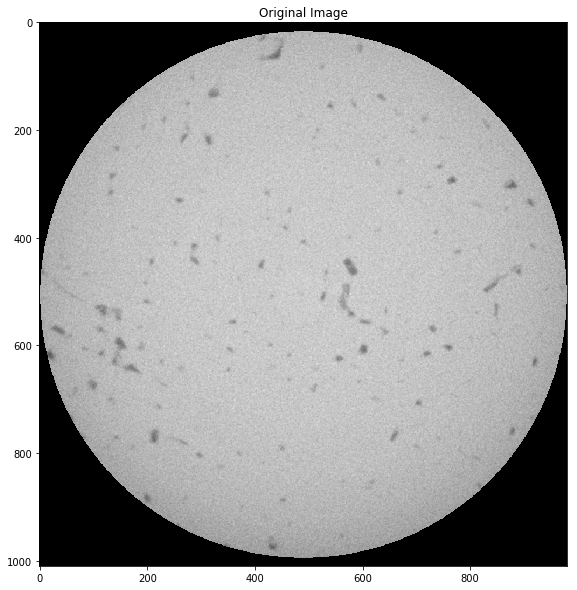

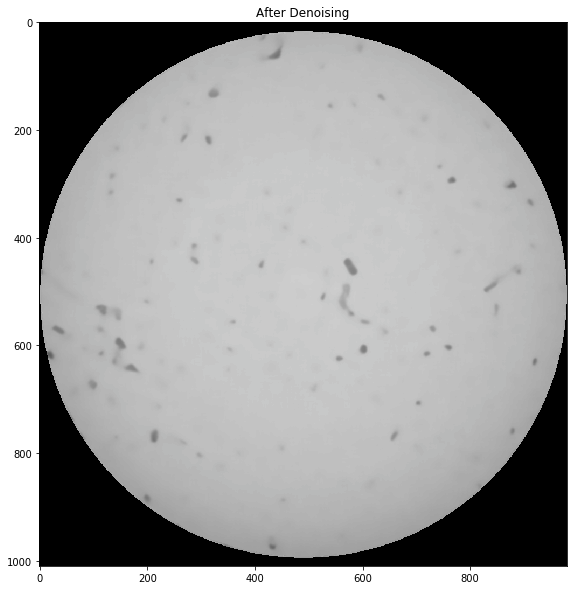

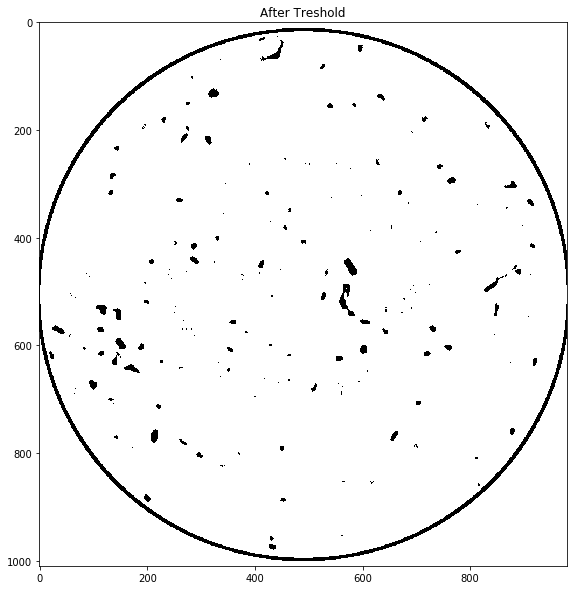

In [39]:
i = 5

## Original Image
plt.figure(figsize = (10,10))
plt.title("Original Image")
plt.imshow(img_list[i])

## Denoised Image
plt.figure(figsize = (10,10))
plt.title("After Denoising")
plt.imshow(img_list_dns[i])

## Threshold Image
plt.figure(figsize = (10,10))
plt.title("After Treshold")
plt.imshow(img_list_ths[i])